In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Problem 1

### a)

In [383]:
data=np.load('sidebands.npz')
t=data['time']
d=data['signal']

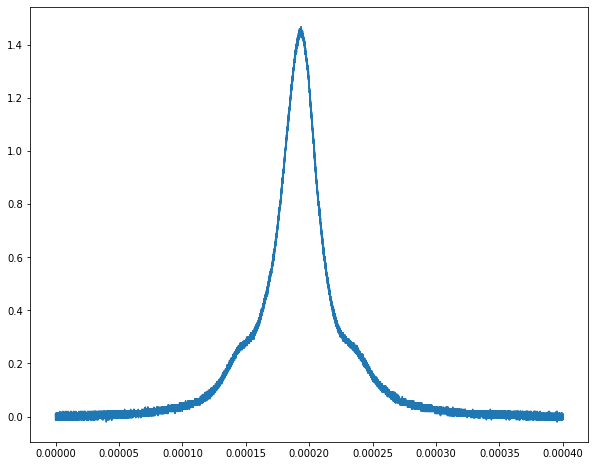

In [494]:
fig = plt.figure(figsize=[10,8])
plt.plot(t,d)

In [388]:
print(t)

[0.00000e+00 4.00000e-09 8.00000e-09 ... 3.99988e-04 3.99992e-04
 3.99996e-04]


[[ 5.00000000e-01  3.50000000e+03 -3.50000000e+03]
 [ 5.00010000e-01  3.50000000e+03 -3.50007000e+03]
 [ 5.00020000e-01  3.49999999e+03 -3.50014000e+03]
 ...
 [ 5.00030001e-01  3.49999999e+03  3.50021000e+03]
 [ 5.00020000e-01  3.49999999e+03  3.50014000e+03]
 [ 5.00010000e-01  3.50000000e+03  3.50007000e+03]]
[5.40872472e-01 7.81487971e-05 1.93485374e-04] 89837.95044810901
[[ 1.40254894e-01  1.66913058e+03 -6.74162310e+02]
 [ 1.40259880e-01  1.66918023e+03 -6.74196304e+02]
 [ 1.40264866e-01  1.66922989e+03 -6.74230300e+02]
 ...
 [ 1.25275143e-01  1.51683713e+03  5.74031427e+02]
 [ 1.25270898e-01  1.51679309e+03  5.74003642e+02]
 [ 1.25266653e-01  1.51674905e+03  5.73975859e+02]]
[ 8.92112059e-01 -2.88417745e-05  1.89191369e-04] 5435.968024576795
[[ 2.27124344e-02 -1.37313579e+03 -2.09331287e+02]
 [ 2.27133730e-02 -1.37319122e+03 -2.09344163e+02]
 [ 2.27143117e-02 -1.37324665e+03 -2.09357040e+02]
 ...
 [ 1.83764490e-02 -1.11592239e+03  1.52683570e+02]
 [ 1.83757645e-02 -1.11588160e+03 

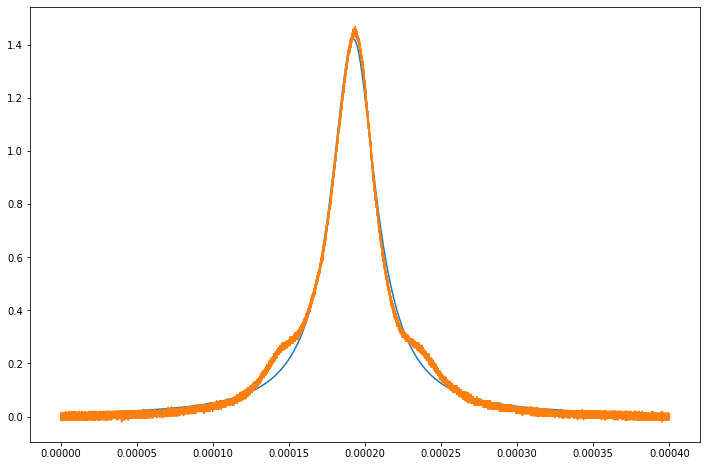

In [399]:
# from lectures

def calc_lorentz(p,t):
    y=p[0]/(1.0+((t-p[2])**2)/p[1]**2)
    grad=np.zeros([t.size,p.size])
    grad[:,0]=1.0/(1.0+((t-p[2])**2)/p[1]**2)
    grad[:,1]=(2.0*p[0]*(t-p[2])**2)/(((1.0+((t-p[2])**2)/p[1]**2)**2)*p[1]**3)
    grad[:,2]=p[0]*2.0*(t-p[2])/(((1.0+((t-p[2])**2)/p[1]**2)**2)*p[1]**2)
    return y,grad

p=np.array([1.4,0.0002,0.0002])

for j in range(6):
    pred,grad=calc_lorentz(p,t)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).T
    grad=np.matrix(grad)
    print(grad)
    if(j == 0):
        thing = grad
    lhs=grad.T@grad
    rhs=grad.T@r
    dp=np.linalg.inv(lhs)@(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]
    print(p,err)
    
fig=plt.figure(figsize=[12,8])
plt.plot(t,pred)
plt.plot(t,d)

Best fit for amplitude: $1.42$, width: $-1.78*10^{-5}$, center: $1.92*10^{-4}$

### b)

In [49]:
N = np.mean((d-pred)**2)
errs=np.sqrt(N*np.diag(np.linalg.inv(grad.T@grad)))
print(N)
print(errs)

0.0006367660496922894
[4.25527335e-04 7.58787601e-09 5.35819267e-09]


Estimated noise: $0.0006$. Estimated error: [4.25527335e-04 7.58787601e-09 5.35819267e-09]

### c)

[5.40872399e-01 7.81488534e-05 1.93485455e-04] 89837.95044810901
[ 8.92111632e-01 -2.88417872e-05  1.89191237e-04] 5435.972288301401
[ 1.31560957e+00 -1.41216838e-05  1.94510149e-04] 1335.5674368653845
[ 1.40155519e+00 -1.80741820e-05  1.92522786e-04] 774.0221730933251
[ 1.42277635e+00 -1.79208862e-05  1.92354522e-04] 66.20656869977137
[ 1.42280623e+00 -1.79237987e-05  1.92366906e-04] 63.67329758518835


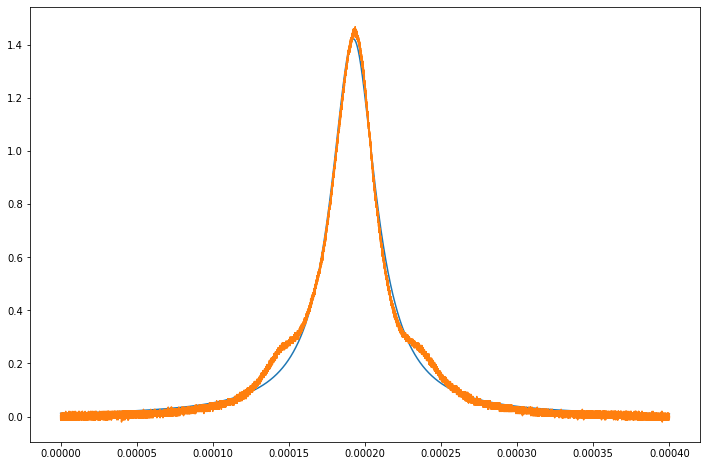

In [583]:
# numerical derivative from assignment 1, modified to allow partial derivative

def third_der(fun, x, t, dx, ind):
    dx_array = np.zeros(np.shape(x), dtype=np.float64)
    dx_array[ind, :] = dx
    temp = (fun(x+2.0*dx_array, t) - 2.0*fun(x+dx_array,t) + 2.0*fun(x-dx_array,t) - fun(x-2.0*dx_array, t))/(2.0*dx**3)
    temp[np.where(temp==0)] = 0.0001
    return temp

def ndiff(fun, x, t, ind, full=False):
    err = 10**-15
    initialdx = 0.001
    newdx = (np.abs((3*fun(x,t)*err)/(2*third_der(fun, x, t, initialdx, ind))))**(1/3)
    diff = np.abs((newdx - initialdx)/newdx)
    while(all(i >= 0.01 for i in diff)):
        temp = (np.abs((3*fun(x,t)*err)/(2*third_der(fun, x, t, newdx, ind))))**(1/3)
        diff = np.abs((temp - newdx)/newdx)
        newdx = temp
    dx_array = np.zeros(np.shape(x), dtype=np.float64)
    dx_array[ind, :] = newdx
    d = (fun(x+dx_array, t) - fun(x-dx_array, t))/(2*newdx)
    if(full):
        return d, newdx, np.abs((fun(x)*err)/(2*newdx) + (third_der(fun, x, newdx)*newdx**2)/6)
    return d

def lorentz(p,t):      
    return (p[0,:]/(1.0+((t-p[2,:])**2)/p[1,:]**2)).astype(np.float64)

def calc_lorentz_num_der(fun,p,t):
    grad=np.zeros([t.size,np.shape(p)[0]], dtype=np.float64)
    y=fun(p,t)
    for i in range(len(p)):
        grad[:,i]=ndiff(lorentz,p,t,i)
    return y,grad

p1=np.array([1.4,0.0002,0.0002])

for j in range(6):
    p_expand=np.full((len(t), len(p1)), p1).T
    pred1,grad1=calc_lorentz_num_der(lorentz,p_expand,t)
    r1=d-pred1
    err1=(r1**2).sum()
    r1=np.matrix(r1).T
    grad1=np.matrix(grad1)
    lhs1=grad1.T@grad1
    rhs1=grad1.T@r1
    dp1=np.linalg.inv(lhs1)@(rhs1)
    for jj in range(p1.size):
        p1[jj]=p1[jj]+dp1[jj]
    print(p1,err1)
    
fig=plt.figure(figsize=[12,8])
plt.plot(t,pred1)
plt.plot(t,d)

Not significantly different from using analytic derivative. Except much harder because was getting division by zero because of floating point, had to manually set these zeros to small value.

### d)

[ 1.40133714  0.18916486  0.20448365  0.00194588  0.00571159 -0.00190725] 460.12626239510126
[ 1.39152777  0.1382546   0.33203465  0.02076816 -0.04369338 -0.02116762] 50404.270714914004
[ 1.42946853 -0.08316192  0.45816034  0.03102825 -0.09371883 -0.03102177] 59149.39959868422
[ 1.31573088  0.49839681  0.54308296 -0.02921971 -0.12263827 -0.09257143] 49082.39255001119
[ 1.07841433 -0.05674843  1.00159728 -0.06367581 -0.12968891 -0.02977308] 207849.94791830337
[ 1.03309242  0.01528448  0.95522549 -0.10665193 -0.22523048 -0.08828032] 10895.48801570652


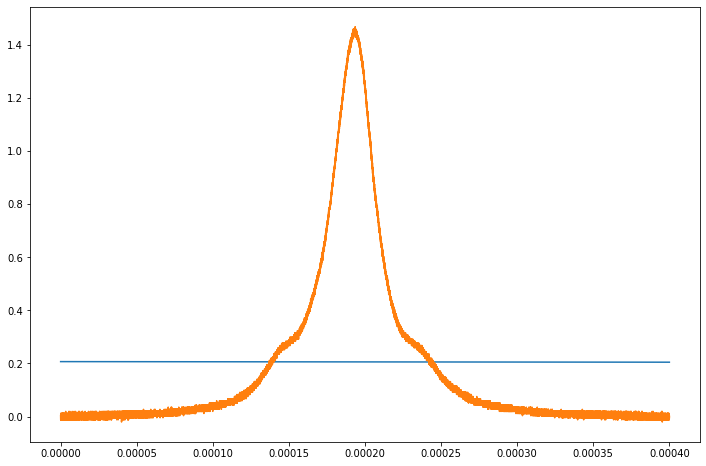

In [611]:
def lorentz_sum(p,t):
    lorentz1 = (p[0,:]/(1.0+((t-p[3,:])**2)/p[5,:]**2))
    lorentz2 = (p[1,:]/(1.0+((t-p[3,:]+p[4,:])**2)/p[5,:]**2))
    lorentz3 = (p[2,:]/(1.0+((t-p[3,:]-p[4,:])**2)/p[5,:]**2))
    return lorentz1 + lorentz2 + lorentz3


p2=np.array([1.4,0.20,0.20,1.92359075e-04,5.0e-05,1.79237987e-05])

for j in range(6):
    p_expand2=np.full((len(t), len(p2)), p2).T
    pred2,grad2=calc_lorentz_num_der(lorentz_sum,p_expand2,t)
    grad2+=0.1*np.random.rand(100000, 6)
    r2=d-pred2
    err2=(r2**2).sum()
    r2=np.matrix(r2).T
    grad2=np.matrix(grad2)
    lhs2=grad2.T@grad2
    rhs2=grad2.T@r2
    dp2=np.linalg.inv(lhs2)@(rhs2)
    for jj in range(p2.size):
        p2[jj]=p2[jj]+dp2[jj]
    print(p2,err2)
    
fig=plt.figure(figsize=[12,8])
plt.plot(t,pred2)
plt.plot(t,d)

Hard to get fit to work. Matrix was singular because derivatives were 0 at certain points in think, so added a bit of noise to try and solve, but fit doesnt work.

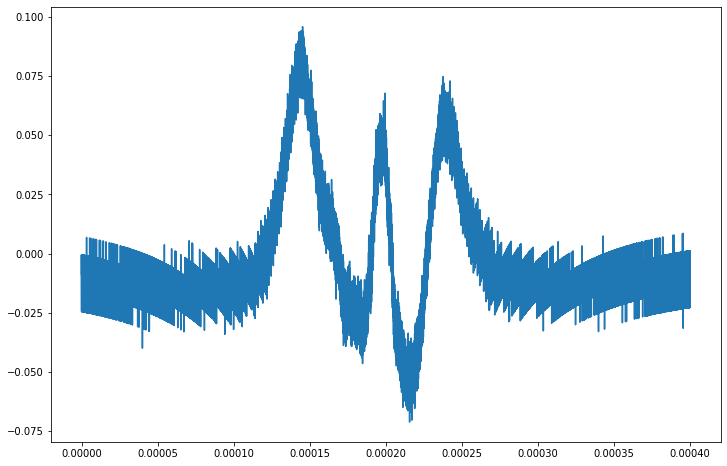

In [612]:
fig=plt.figure(figsize=[12,8])
plt.plot(t,r1)

Very clearly there is structure here. This is the best fit with a single Lorentzian and it is clear that near the peak there are other peaks not accounted for, which is why we modelled it with a sum of three Lorentzians.